In [58]:
%run Global.ipynb
%run Helper_Functions.ipynb

In [66]:
train_df_ohe_selected = pd.read_csv("./Final/Datasets/train_df.csv", keep_default_na=False)

X_orig = train_df_ohe_selected.iloc[:,:-1] # (transformed) attributes
y = train_df_ohe_selected.iloc[:,-1]  # ground truth labels

In [67]:
X = X_orig.drop(['PublishMonth', 'PublishDay'], axis=1)

In [68]:
X

,PublishYear,pagesNumber,Authors_,Authors_aaron mccollough,Authors_abu hamid al ghazali,Authors_agatha christie,Authors_alba de c spedes,Authors_alexander kent,Authors_alexander schmemann,Authors_alexandre dumas,...,step step,book offer,young woman,science fiction,well known,br em,real life,tell story,african american,san francisco
0,0.928571,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.857143,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.928571,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.928571,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.928571,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23058,0.857143,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23059,0.928571,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23060,0.857143,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23061,0.928571,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
# run in terminal: python -m pip install mlxtend
# https://rasbt.github.io/mlxtend/user_guide/classifier/StackingCVClassifier/#example-3-stacked-cv-classification-and-gridsearch
import mlxtend
from mlxtend.classifier import StackingCVClassifier

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm

# Choosing Base classifiers

In [71]:
# multinomial NB
mnb = MultinomialNB()

# linear svm
linearSVM = svm.LinearSVC(random_state=30027, C=5, dual=False)

# logr
logr = LogisticRegression(solver='sag', max_iter=100, random_state = 30027)

# decision tree
dt = DecisionTreeClassifier(max_depth = 400, random_state = 30027)

# knn
knn = KNeighborsClassifier(n_neighbors=3)

MultinomialNB prediction took 1.0031979084014893 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.705479    0.175468      0.281037       0.734207    0.967921   
1       0.738462    0.163543      0.267782       0.734136    0.977791   
2       0.750000    0.179181      0.289256       0.737284    0.974707   
3       0.712000    0.151877      0.250352       0.733179    0.974707   
4       0.755396    0.179181      0.289655       0.735253    0.976558   
5       0.666667    0.163823      0.263014       0.735115    0.967304   
6       0.717949    0.143345      0.238976       0.731178    0.976558   
7       0.767442    0.168942      0.276923       0.737135    0.980876   
8       0.739726    0.183986      0.294679       0.737482    0.972840   
9       0.721311    0.149915      0.248237       0.732499    0.975309   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.835019       0.500000    0.121212      0.195122  0.729952  

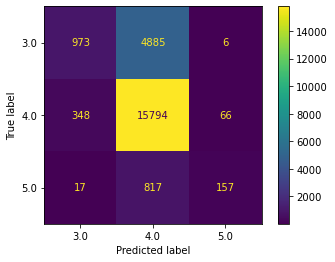

,mean,std
3.0_precision,0.727443,0.029259
3.0_recall,0.165926,0.013950
3.0_f1-score,0.269991,0.019470
4.0_precision,0.734747,0.002133
4.0_recall,0.974457,0.004197
4.0_f1-score,0.837788,0.002104
5.0_precision,0.693977,0.110209
5.0_recall,0.158444,0.031332
5.0_f1-score,0.256528,0.045173
accuracy,0.733816,0.003497


In [72]:
# MultinomialNB
mnb_pred, mnb_report = cross_val_report(mnb, X, y)
mnb_report

LinearSVC prediction took 6.870452880859375 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.730769    0.194208      0.306864       0.739583    0.963603   
1       0.724138    0.178876      0.286885       0.737659    0.967921   
2       0.741722    0.191126      0.303935       0.738845    0.970389   
3       0.727273    0.177474      0.285322       0.737682    0.969772   
4       0.804054    0.203072      0.324251       0.742602    0.975324   
5       0.687500    0.168942      0.271233       0.737635    0.966070   
6       0.766129    0.162116      0.267606       0.734912    0.976558   
7       0.763889    0.187713      0.301370       0.741436    0.974707   
8       0.760274    0.189097      0.302865       0.737805    0.970988   
9       0.750000    0.168654      0.275382       0.736966    0.968519   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.836860       0.461538    0.181818      0.260870  0.734287  
1   

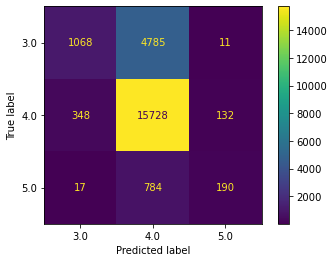

,mean,std
3.0_precision,0.745575,0.031295
3.0_recall,0.182128,0.013053
3.0_f1-score,0.292571,0.018194
4.0_precision,0.738512,0.002225
4.0_recall,0.970385,0.004164
4.0_f1-score,0.838713,0.002267
5.0_precision,0.571962,0.073321
5.0_recall,0.191788,0.039204
5.0_f1-score,0.285754,0.049035
accuracy,0.736505,0.003585


In [73]:
# linear SVM
svm_pred, svm_report = cross_val_report(linearSVM, X, y)
svm_report

LogisticRegression prediction took 71.28005886077881 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.721854    0.185690      0.295393       0.734295    0.973473   
1       0.717391    0.168654      0.273103       0.732747    0.975941   
2       0.673333    0.172355      0.274457       0.731844    0.969772   
3       0.686131    0.160410      0.260028       0.731787    0.972856   
4       0.780142    0.187713      0.302613       0.736427    0.979025   
5       0.656489    0.146758      0.239888       0.729592    0.970389   
6       0.741667    0.151877      0.252125       0.731371    0.980876   
7       0.728571    0.174061      0.280992       0.734571    0.976558   
8       0.731544    0.185690      0.296196       0.734760    0.974691   
9       0.692857    0.165247      0.266850       0.731787    0.973457   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.837135       0.714286    0.050505      0.094340  0.7334

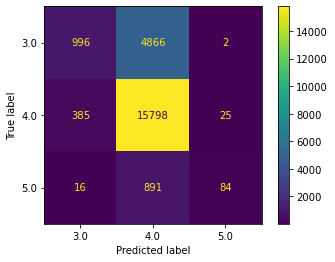

,mean,std
3.0_precision,0.712998,0.036375
3.0_recall,0.169846,0.014193
3.0_f1-score,0.274164,0.020295
4.0_precision,0.732918,0.002042
4.0_recall,0.974704,0.003515
4.0_f1-score,0.836691,0.002245
5.0_precision,0.760686,0.098976
5.0_recall,0.084788,0.026230
5.0_f1-score,0.151454,0.041900
accuracy,0.731822,0.003996


In [74]:
# logistic regression
logr_pred, logr_report = cross_val_report(logr, X, y)
logr_report

DecisionTreeClassifier prediction took 22.818252086639404 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.407407    0.243612      0.304904       0.732984    0.863664   
1       0.447977    0.264055      0.332262       0.735888    0.876619   
2       0.436364    0.245734      0.314410       0.734609    0.876002   
3       0.426934    0.254266      0.318717       0.736184    0.871067   
4       0.450311    0.247440      0.319383       0.735082    0.881555   
5       0.462783    0.244027      0.319553       0.738438    0.886490   
6       0.424051    0.228669      0.297118       0.729135    0.878470   
7       0.425982    0.240614      0.307525       0.732990    0.877236   
8       0.426829    0.238501      0.306011       0.730789    0.874691   
9       0.440580    0.258944      0.326180       0.733472    0.869753   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.792976       0.347826    0.161616      0.220690  0

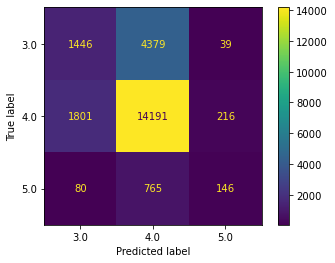

,mean,std
3.0_precision,0.434922,0.015993
3.0_recall,0.246586,0.010305
3.0_f1-score,0.314606,0.010718
4.0_precision,0.733957,0.002705
4.0_recall,0.875555,0.006361
4.0_f1-score,0.798519,0.003508
5.0_precision,0.366968,0.054962
5.0_recall,0.147343,0.024932
5.0_f1-score,0.209363,0.030172
accuracy,0.684343,0.005058


In [75]:
# decision tree
dt_pred, dt_report = cross_val_report(dt, X, y)
dt_report

KNeighborsClassifier prediction took 12.62077808380127 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.451613    0.238501      0.312152       0.733671    0.893893   
1       0.354922    0.233390      0.281603       0.724790    0.851326   
2       0.341404    0.240614      0.282282       0.724854    0.840222   
3       0.367876    0.242321      0.292181       0.727655    0.853794   
4       0.349367    0.235495      0.281346       0.724868    0.845157   
5       0.383085    0.262799      0.311741       0.731981    0.845774   
6       0.367454    0.238908      0.289555       0.725066    0.847625   
7       0.364303    0.254266      0.299497       0.728098    0.840839   
8       0.342984    0.262351      0.297297       0.725938    0.824074   
9       0.391414    0.264055      0.315361       0.731746    0.853704   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.805895       0.409091    0.090909      0.148760  0.69

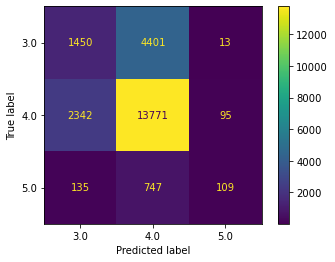

,mean,std
3.0_precision,0.371442,0.032513
3.0_recall,0.247270,0.012230
3.0_f1-score,0.296302,0.013178
4.0_precision,0.727867,0.003413
4.0_recall,0.849641,0.017807
4.0_f1-score,0.783995,0.008888
5.0_precision,0.513586,0.091239
5.0_recall,0.110030,0.021148
5.0_f1-score,0.179836,0.029675
accuracy,0.664700,0.011720


In [76]:
# knn
knn_pred, knn_report = cross_val_report(knn, X, y)
knn_report

In [79]:
base_classifiers = ["mnb", "svm", "logr", "dt", "knn", "actual_y"]
predictions = [mnb_pred, svm_pred, logr_pred, dt_pred, knn_pred, y]
full_predictions = pd.DataFrame({base_classifiers[i]:predictions[i] for i in range(6)})

In [80]:
full_predictions

,mnb,svm,logr,dt,knn,actual_y
0,4.0,4.0,4.0,4.0,4.0,4.0
1,4.0,4.0,4.0,4.0,4.0,4.0
2,4.0,4.0,4.0,4.0,4.0,4.0
3,4.0,4.0,4.0,4.0,4.0,4.0
4,4.0,4.0,4.0,4.0,4.0,3.0
...,...,...,...,...,...,...
23058,4.0,4.0,4.0,4.0,4.0,4.0
23059,4.0,4.0,4.0,4.0,4.0,4.0
23060,4.0,4.0,4.0,4.0,4.0,4.0
23061,4.0,4.0,4.0,4.0,4.0,4.0


In [81]:
# same predictions
accurate_instances = list(full_predictions.loc[(full_predictions["mnb"] == full_predictions["svm"]) & 
                     (full_predictions["mnb"] == full_predictions["logr"]) & 
                     (full_predictions["mnb"] == full_predictions["dt"]) & 
                     (full_predictions["mnb"] == full_predictions["knn"])].index)

In [82]:
len(accurate_instances)

12882

In [83]:
# all inaccurate predictions
inaccurate_instances = list(full_predictions.loc[(full_predictions["actual_y"] != full_predictions["svm"]) & 
                     (full_predictions["actual_y"] != full_predictions["logr"]) & 
                     (full_predictions["actual_y"] != full_predictions["dt"]) & 
                     (full_predictions["actual_y"] != full_predictions["knn"]) & 
                     (full_predictions["actual_y"] != full_predictions["mnb"])].index)

In [84]:
len(inaccurate_instances)

4447

## 5 Base Classifiers

In [85]:
sclf5 = StackingCVClassifier(classifiers=[mnb, linearSVM, logr, dt, knn], 
                            meta_classifier=LogisticRegression(random_state = 30027),
                            cv = 2,
                            random_state=30027)

## 4 Base Classifiers

### remove kNN

In [94]:
sclf_knn = StackingCVClassifier(classifiers=[mnb, linearSVM, logr, dt], 
                            meta_classifier=LogisticRegression(random_state = 30027),
                            cv = 2,
                            random_state=30027)
y_pred_knn, sclf_knn_report = cross_val_report(sclf_knn, X, y)
sclf_knn_report

KeyboardInterrupt: 

### remove decision tree

In [ ]:
sclf_dt = StackingCVClassifier(classifiers=[mnb, linearSVM, logr, knn], 
                            meta_classifier=LogisticRegression(random_state = 30027),
                            cv = 2,
                            random_state=30027)
y_pred_dt, sclf_dt_report = cross_val_report(sclf_dt, X, y)
sclf_dt_report

## 3 Base Classifiers

StackingCVClassifier prediction took 434.00854086875916 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.706587    0.201022      0.312997       0.738208    0.965453   
1       0.748092    0.166951      0.272981       0.734722    0.979025   
2       0.701754    0.204778      0.317041       0.739028    0.966070   
3       0.733813    0.174061      0.281379       0.735691    0.975324   
4       0.769231    0.204778      0.323450       0.740515    0.975324   
5       0.731343    0.167235      0.272222       0.736376    0.975324   
6       0.737705    0.153584      0.254237       0.732564    0.978408   
7       0.765101    0.194539      0.310204       0.741815    0.978408   
8       0.791367    0.187394      0.303030       0.737111    0.979630   
9       0.726027    0.180579      0.289222       0.737828    0.972840   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.836675       0.500000    0.101010      0.168067  0.7

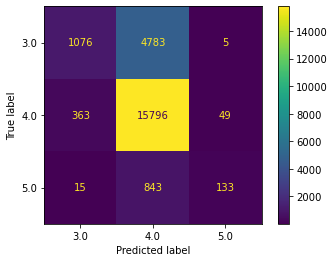

,mean,std
3.0_precision,0.741102,0.028026
3.0_recall,0.183492,0.017890
3.0_f1-score,0.293676,0.023049
4.0_precision,0.737386,0.002734
4.0_recall,0.974581,0.005110
4.0_f1-score,0.839542,0.002193
5.0_precision,0.711663,0.125478
5.0_recall,0.134253,0.034482
5.0_f1-score,0.224902,0.052759
accuracy,0.737328,0.003484


In [44]:
# remove both kNN and decision tree
sclf3 = StackingCVClassifier(classifiers=[mnb, linearSVM, logr], 
                            meta_classifier=LogisticRegression(random_state = 30027),
                            cv = 2,
                            random_state=30027)
y_pred3, sclf3_report = cross_val_report(sclf3, X, y)
sclf3_report

# Choosing Metaclassifier

============================== Logistic regression ==============================
StackingCVClassifier prediction took 406.7455909252167 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.706587    0.201022      0.312997       0.738208    0.965453   
1       0.748092    0.166951      0.272981       0.734722    0.979025   
2       0.701754    0.204778      0.317041       0.739028    0.966070   
3       0.733813    0.174061      0.281379       0.735691    0.975324   
4       0.769231    0.204778      0.323450       0.740515    0.975324   
5       0.731343    0.167235      0.272222       0.736376    0.975324   
6       0.737705    0.153584      0.254237       0.732564    0.978408   
7       0.765101    0.194539      0.310204       0.741815    0.978408   
8       0.791367    0.187394      0.303030       0.737111    0.979630   
9       0.726027    0.180579      0.289222       0.737828    0.972840   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f

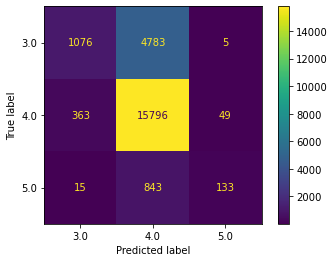

                   mean       std
3.0_precision  0.741102  0.028026
3.0_recall     0.183492  0.017890
3.0_f1-score   0.293676  0.023049
4.0_precision  0.737386  0.002734
4.0_recall     0.974581  0.005110
4.0_f1-score   0.839542  0.002193
5.0_precision  0.711663  0.125478
5.0_recall     0.134253  0.034482
5.0_f1-score   0.224902  0.052759
accuracy       0.737328  0.003484



============================== Categorical naive bayes ==============================
StackingCVClassifier prediction took 519.4055509567261 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.701087    0.219761      0.334630       0.743639    0.955583   
1       0.691358    0.190801      0.299065       0.740389    0.962369   
2       0.689266    0.208191      0.319790       0.742721    0.959901   
3       0.692771    0.196246      0.305851       0.740864    0.962986   
4       0.723757    0.223549      0.341591       0.745455    0.961135   
5       0.683230    0.187713      

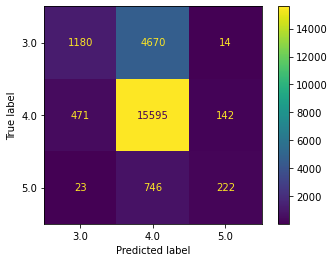

                   mean       std
3.0_precision  0.705137  0.016822
3.0_recall     0.201227  0.013148
3.0_f1-score   0.312887  0.016151
4.0_precision  0.742235  0.001515
4.0_recall     0.962179  0.003679
4.0_f1-score   0.838011  0.001319
5.0_precision  0.587615  0.067444
5.0_recall     0.224051  0.034477
5.0_f1-score   0.323771  0.044102
accuracy       0.736981  0.002263





In [100]:
# 3 base classifiers
sclf = sclf3
meta_clfs = {"Logistic regression": LogisticRegression(random_state = 30027), "Categorical naive bayes": CategoricalNB()}
predictions = {}
reports = {}
for name, meta_clf in meta_clfs.items(): 
    sclf.meta_classifier = meta_clf
    print(f'============================== {name} ==============================')
    predictions[name], reports[name] = cross_val_report(sclf, X, y)
    print(reports[name])
    print('\n\n')

============================== Logistic regression ==============================
StackingCVClassifier prediction took 469.1887540817261 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.729032    0.192504      0.304582       0.737213    0.969155   
1       0.726619    0.172061      0.278237       0.735734    0.970389   
2       0.751773    0.180887      0.291609       0.736156    0.975941   
3       0.733813    0.174061      0.281379       0.735691    0.975324   
4       0.774648    0.187713      0.302198       0.737209    0.977791   
5       0.730496    0.175768      0.283356       0.738195    0.974090   
6       0.745902    0.155290      0.257062       0.733025    0.979025   
7       0.770833    0.189420      0.304110       0.741017    0.979642   
8       0.789855    0.185690      0.300690       0.736427    0.979630   
9       0.726027    0.180579      0.289222       0.737850    0.974691   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f

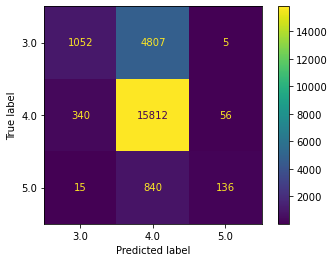

                   mean       std
3.0_precision  0.747900  0.023116
3.0_recall     0.179397  0.010859
3.0_f1-score   0.289245  0.014959
4.0_precision  0.736852  0.002063
4.0_recall     0.975568  0.003668
4.0_f1-score   0.839567  0.001958
5.0_precision  0.689719  0.120869
5.0_recall     0.137283  0.042488
5.0_f1-score   0.227178  0.062595
accuracy       0.737112  0.002908



============================== Categorical naive bayes ==============================
StackingCVClassifier prediction took 467.2307381629944 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.701087    0.219761      0.334630       0.744264    0.960518   
1       0.691358    0.190801      0.299065       0.740038    0.962369   
2       0.689266    0.208191      0.319790       0.741782    0.960518   
3       0.692771    0.196246      0.305851       0.740548    0.966687   
4       0.723757    0.223549      0.341591       0.745098    0.961135   
5       0.683230    0.187713      

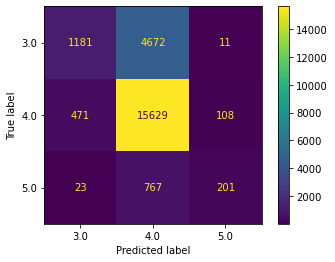

                   mean       std
3.0_precision  0.705311  0.016819
3.0_recall     0.201398  0.013186
3.0_f1-score   0.313110  0.016202
4.0_precision  0.741842  0.001686
4.0_recall     0.964277  0.003470
4.0_f1-score   0.838555  0.001241
5.0_precision  0.630414  0.067867
5.0_recall     0.202869  0.033710
5.0_f1-score   0.305772  0.042815
accuracy       0.737589  0.002164





In [101]:
# 4 base classifiers - removed kNN
sclf = sclf_knn
meta_clfs = {"Logistic regression": LogisticRegression(random_state = 30027), "Categorical naive bayes": CategoricalNB()}
predictions = {}
reports = {}
for name, meta_clf in meta_clfs.items(): 
    sclf.meta_classifier = meta_clf
    print(f'============================== {name} ==============================')
    predictions[name], reports[name] = cross_val_report(sclf, X, y)
    print(reports[name])
    print('\n\n')

## Hyperparameter Tuning

### 5 base classifiers

In [89]:
sclf5 = StackingCVClassifier(classifiers=[mnb, linearSVM, logr, dt, knn], 
                            meta_classifier=CategoricalNB(),
                            cv = 2,
                            random_state=30027)
param_grid = {'linearsvc__C': [1,5], 'multinomialnb__alpha': [0.5, 1], 'logisticregression__max_iter': [100, 150], 'decisiontreeclassifier__max_depth': [200, 400], 'kneighborsclassifier__n_neighbors': [5, 10]}
grid5 = tune_hyperparameter(sclf5, param_grid, X, y, cv=2)

Fitting 2 folds for each of 32 candidates, totalling 64 fits
[CV] END decisiontreeclassifier__max_depth=200, kneighborsclassifier__n_neighbors=5, linearsvc__C=1, logisticregression__max_iter=100, multinomialnb__alpha=0.5; total time=  15.0s
[CV] END decisiontreeclassifier__max_depth=200, kneighborsclassifier__n_neighbors=5, linearsvc__C=1, logisticregression__max_iter=100, multinomialnb__alpha=0.5; total time=  17.7s
[CV] END decisiontreeclassifier__max_depth=200, kneighborsclassifier__n_neighbors=5, linearsvc__C=1, logisticregression__max_iter=100, multinomialnb__alpha=1; total time=  14.0s
[CV] END decisiontreeclassifier__max_depth=200, kneighborsclassifier__n_neighbors=5, linearsvc__C=1, logisticregression__max_iter=100, multinomialnb__alpha=1; total time=  16.8s
[CV] END decisiontreeclassifier__max_depth=200, kneighborsclassifier__n_neighbors=5, linearsvc__C=1, logisticregression__max_iter=150, multinomialnb__alpha=0.5; total time=  15.0s
[CV] END decisiontreeclassifier__max_depth=

[CV] END decisiontreeclassifier__max_depth=400, kneighborsclassifier__n_neighbors=5, linearsvc__C=5, logisticregression__max_iter=150, multinomialnb__alpha=1; total time=  21.4s
[CV] END decisiontreeclassifier__max_depth=400, kneighborsclassifier__n_neighbors=5, linearsvc__C=5, logisticregression__max_iter=150, multinomialnb__alpha=1; total time=  20.3s
[CV] END decisiontreeclassifier__max_depth=400, kneighborsclassifier__n_neighbors=10, linearsvc__C=1, logisticregression__max_iter=100, multinomialnb__alpha=0.5; total time=  20.9s
[CV] END decisiontreeclassifier__max_depth=400, kneighborsclassifier__n_neighbors=10, linearsvc__C=1, logisticregression__max_iter=100, multinomialnb__alpha=0.5; total time=  20.7s
[CV] END decisiontreeclassifier__max_depth=400, kneighborsclassifier__n_neighbors=10, linearsvc__C=1, logisticregression__max_iter=100, multinomialnb__alpha=1; total time=  22.7s
[CV] END decisiontreeclassifier__max_depth=400, kneighborsclassifier__n_neighbors=10, linearsvc__C=1, l

In [91]:
print(max(grid5['mean_test_accuracy']))
grid5.loc[grid5['mean_test_accuracy'] == max(grid5['mean_test_accuracy'])]['params'].values

0.7341628861956007


array([{'decisiontreeclassifier__max_depth': 200, 'kneighborsclassifier__n_neighbors': 10, 'linearsvc__C': 5, 'logisticregression__max_iter': 100, 'multinomialnb__alpha': 1},
       {'decisiontreeclassifier__max_depth': 200, 'kneighborsclassifier__n_neighbors': 10, 'linearsvc__C': 5, 'logisticregression__max_iter': 150, 'multinomialnb__alpha': 1}],
      dtype=object)

StackingCVClassifier prediction took 327.61754417419434 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.707182    0.218058      0.333333       0.743897    0.958667   
1       0.708333    0.202726      0.315232       0.742518    0.964220   
2       0.682081    0.201365      0.310935       0.741536    0.959284   
3       0.680723    0.192833      0.300532       0.739915    0.961752   
4       0.754491    0.215017      0.334661       0.743128    0.967304   
5       0.662577    0.184300      0.288385       0.740229    0.958051   
6       0.724138    0.179181      0.287278       0.739539    0.970389   
7       0.713415    0.199659      0.312000       0.742439    0.969155   
8       0.707602    0.206133      0.319261       0.741322    0.962346   
9       0.707792    0.185690      0.294197       0.739336    0.962963   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.837736       0.513514    0.191919      0.279412  0.7

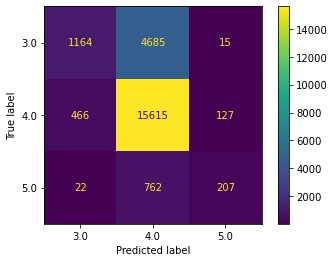

,mean,std
3.0_precision,0.704833,0.025454
3.0_recall,0.198496,0.012962
3.0_f1-score,0.309581,0.016970
4.0_precision,0.741386,0.001594
4.0_recall,0.963413,0.004344
4.0_f1-score,0.837937,0.001903
5.0_precision,0.596641,0.080955
5.0_recall,0.208899,0.037003
5.0_f1-score,0.308028,0.046244
accuracy,0.736504,0.003254


In [93]:
# base classifiers with tuned hyperparameters
mnb = MultinomialNB(alpha = 1)
linearSVM = svm.LinearSVC(C=5, dual=False,random_state=30027)
logr = LogisticRegression(solver='sag', max_iter=100, random_state = 30027)
dt = DecisionTreeClassifier(max_depth = 200, random_state = 30027)
knn = KNeighborsClassifier(n_neighbors=10)
sclf5 = StackingCVClassifier(classifiers=[mnb, linearSVM, logr, dt, knn], 
                            meta_classifier=CategoricalNB(),
                            cv = 2,
                            random_state=30027)
y_pred5, sclf5_report = cross_val_report(sclf5, X, y)
sclf5_report

### 3 params & Meta classifier = CategoricalNB

In [ ]:
sclf3.get_params()

In [108]:
param_grid = {'linearsvc__C': [1,5], 'multinomialnb__alpha': [0.1, 0.5, 1], 'logisticregression__max_iter': [100, 150]}
sclf3_cat = StackingCVClassifier(classifiers=[mnb, linearSVM, logr], 
                            meta_classifier=CategoricalNB(),
                            cv = 2,
                            random_state=30027)
sclf3_cat.meta_classifier = CategoricalNB()
grid_cat = tune_hyperparameter(sclf3_cat, param_grid, X, y, cv=2)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV] END linearsvc__C=1, logisticregression__max_iter=100, multinomialnb__alpha=0.1; total time=   8.7s
[CV] END linearsvc__C=1, logisticregression__max_iter=100, multinomialnb__alpha=0.1; total time=   8.9s
[CV] END linearsvc__C=1, logisticregression__max_iter=100, multinomialnb__alpha=0.5; total time=   9.5s
[CV] END linearsvc__C=1, logisticregression__max_iter=100, multinomialnb__alpha=0.5; total time=   9.6s
[CV] END linearsvc__C=1, logisticregression__max_iter=100, multinomialnb__alpha=1; total time=   8.8s
[CV] END linearsvc__C=1, logisticregression__max_iter=100, multinomialnb__alpha=1; total time=  11.2s
[CV] END linearsvc__C=1, logisticregression__max_iter=150, multinomialnb__alpha=0.1; total time=  10.9s
[CV] END linearsvc__C=1, logisticregression__max_iter=150, multinomialnb__alpha=0.1; total time=  12.3s
[CV] END linearsvc__C=1, logisticregression__max_iter=150, multinomialnb__alpha=0.5; total time=  11.6s
[CV] EN

In [ ]:
r = re.compile('(^(rank_test).*(f1-score|accuracy)$)|(mean_test_accuracy)|(params)')
score_metrics = list(filter(r.match, grid_cat.columns))
grid_cat[score_metrics]

In [109]:
print(max(grid_cat['mean_test_accuracy']))
grid_cat.loc[grid_cat['mean_test_accuracy'] == max(grid_cat['mean_test_accuracy'])]['params'].values

0.7337292874990828


array([{'linearsvc__C': 5, 'logisticregression__max_iter': 100, 'multinomialnb__alpha': 1},
       {'linearsvc__C': 5, 'logisticregression__max_iter': 150, 'multinomialnb__alpha': 1}],
      dtype=object)

StackingCVClassifier prediction took 219.88521099090576 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.707182    0.218058      0.333333       0.743159    0.954966   
1       0.708333    0.202726      0.315232       0.743798    0.961752   
2       0.682081    0.201365      0.310935       0.741305    0.959901   
3       0.680723    0.192833      0.300532       0.741076    0.960518   
4       0.754491    0.215017      0.334661       0.744175    0.965453   
5       0.666667    0.184300      0.288770       0.740229    0.958051   
6       0.724138    0.179181      0.287278       0.739849    0.966687   
7       0.717791    0.199659      0.312417       0.742424    0.967304   
8       0.707602    0.206133      0.319261       0.741412    0.959259   
9       0.707792    0.185690      0.294197       0.740229    0.958642   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.835853       0.441860    0.191919      0.267606  0.7

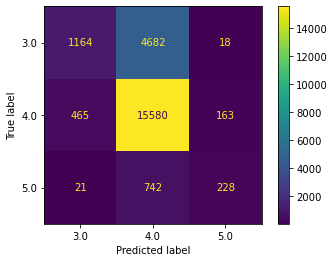

,mean,std
3.0_precision,0.705680,0.024920
3.0_recall,0.198496,0.012962
3.0_f1-score,0.309662,0.016924
4.0_precision,0.741766,0.001546
4.0_recall,0.961253,0.004041
4.0_f1-score,0.837362,0.001919
5.0_precision,0.560085,0.065563
5.0_recall,0.230111,0.038841
5.0_f1-score,0.324705,0.044853
accuracy,0.735897,0.003116


In [110]:
# waiting for result
mnb = MultinomialNB(alpha = 1)
linearSVM = svm.LinearSVC(random_state=30027, C=5)
logr = LogisticRegression(solver='sag', max_iter=100, random_state = 30027)

sclf3_cat = StackingCVClassifier(classifiers=[mnb, linearSVM, logr], 
                            meta_classifier=CategoricalNB(),
                            cv = 2,
                            random_state=30027)
y_pred3_cat, sclf3_cat_report = cross_val_report(sclf3_cat, X, y)
sclf3_cat_report

### Meta classifier = LogisticRegression

In [ ]:
param_grid = {'linearsvc__C': [1,3,5], 'multinomialnb__alpha': [0.1, 0.3, 0.5, 0.7, 1], 'logisticregression__max_iter': [50, 100, 150]}
sclf3.meta_classifier = LogisticRegression(random_state = 30027)
grid_logr = tune_hyperparameter(sclf3, param_grid, X, y, cv=2)


In [ ]:
r = re.compile('(^(rank_test).*(f1-score|accuracy)$)|(mean_test_accuracy)|(params)')
score_metrics = list(filter(r.match, grid_logr.columns))
grid_logr[score_metrics]

In [67]:
print(max(grid_logr['mean_test_accuracy']))
grid_logr.loc[grid_logr['mean_test_accuracy'] == max(grid_logr['mean_test_accuracy'])]['params'].values

0.7314745900695746


array([{'linearsvc__C': 5, 'logisticregression__max_iter': 150, 'multinomialnb__alpha': 0.5}],
      dtype=object)

StackingCVClassifier prediction took 201.6617090702057 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.716981    0.194208      0.305630       0.738084    0.964837   
1       0.729730    0.183986      0.293878       0.737928    0.971006   
2       0.718954    0.187713      0.297700       0.735708    0.968538   
3       0.731884    0.172355      0.279006       0.735514    0.971006   
4       0.806202    0.177474      0.290909       0.736305    0.978408   
5       0.692857    0.165529      0.267218       0.735267    0.969772   
6       0.761468    0.141638      0.238849       0.730699    0.980876   
7       0.804688    0.175768      0.288515       0.739211    0.982727   
8       0.760274    0.189097      0.302865       0.737138    0.972840   
9       0.746269    0.170358      0.277393       0.733919    0.979012   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.836364       0.482759    0.141414      0.218750  0.73

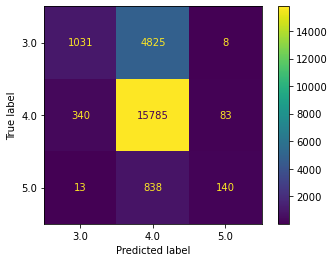

,mean,std
3.0_precision,0.746931,0.037065
3.0_recall,0.175813,0.015061
3.0_f1-score,0.284196,0.019904
4.0_precision,0.735977,0.002428
4.0_recall,0.973902,0.005952
4.0_f1-score,0.838375,0.002314
5.0_precision,0.612833,0.131564
5.0_recall,0.141333,0.040259
5.0_f1-score,0.227779,0.060048
accuracy,0.735204,0.003621


In [95]:
mnb = MultinomialNB(alpha = 0.5)
linearSVM = svm.LinearSVC(random_state=30027, C=5)
logr = LogisticRegression(solver='sag', max_iter=150, random_state = 30027)

sclf3_logr = StackingCVClassifier(classifiers=[mnb, linearSVM, logr], 
                            meta_classifier=LogisticRegression(random_state = 30027),
                            cv = 2,
                            random_state=30027)
y_pred3_logr, sclf3_logr_report = cross_val_report(sclf3_logr, X, y)
sclf3_logr_report

### 4 base classifiers without kNN

In [96]:
param_grid = {'linearsvc__C': [1,3,5], 'multinomialnb__alpha': [0.1, 0.5, 1], 'logisticregression__max_iter': [50, 100, 150], 'decisiontreeclassifier__max_depth': [200, 300, 400]}
sclf_knn.meta_classifier = CategoricalNB()
grid4_cat = tune_hyperparameter(sclf_knn, param_grid, X, y, cv=2)

Fitting 2 folds for each of 81 candidates, totalling 162 fits
[CV] END decisiontreeclassifier__max_depth=200, linearsvc__C=1, logisticregression__max_iter=50, multinomialnb__alpha=0.1; total time=  10.3s
[CV] END decisiontreeclassifier__max_depth=200, linearsvc__C=1, logisticregression__max_iter=50, multinomialnb__alpha=0.1; total time=  10.4s
[CV] END decisiontreeclassifier__max_depth=200, linearsvc__C=1, logisticregression__max_iter=50, multinomialnb__alpha=0.5; total time=  10.8s
[CV] END decisiontreeclassifier__max_depth=200, linearsvc__C=1, logisticregression__max_iter=50, multinomialnb__alpha=0.5; total time=  11.6s
[CV] END decisiontreeclassifier__max_depth=200, linearsvc__C=1, logisticregression__max_iter=50, multinomialnb__alpha=1; total time=  10.0s
[CV] END decisiontreeclassifier__max_depth=200, linearsvc__C=1, logisticregression__max_iter=50, multinomialnb__alpha=1; total time=  10.2s
[CV] END decisiontreeclassifier__max_depth=200, linearsvc__C=1, logisticregression__max_it

[CV] END decisiontreeclassifier__max_depth=300, linearsvc__C=1, logisticregression__max_iter=50, multinomialnb__alpha=1; total time=   9.3s
[CV] END decisiontreeclassifier__max_depth=300, linearsvc__C=1, logisticregression__max_iter=50, multinomialnb__alpha=1; total time=   9.8s
[CV] END decisiontreeclassifier__max_depth=300, linearsvc__C=1, logisticregression__max_iter=100, multinomialnb__alpha=0.1; total time=   8.8s
[CV] END decisiontreeclassifier__max_depth=300, linearsvc__C=1, logisticregression__max_iter=100, multinomialnb__alpha=0.1; total time=   9.6s
[CV] END decisiontreeclassifier__max_depth=300, linearsvc__C=1, logisticregression__max_iter=100, multinomialnb__alpha=0.5; total time=   9.1s
[CV] END decisiontreeclassifier__max_depth=300, linearsvc__C=1, logisticregression__max_iter=100, multinomialnb__alpha=0.5; total time=   9.8s
[CV] END decisiontreeclassifier__max_depth=300, linearsvc__C=1, logisticregression__max_iter=100, multinomialnb__alpha=1; total time=   8.8s
[CV] EN

[CV] END decisiontreeclassifier__max_depth=400, linearsvc__C=1, logisticregression__max_iter=100, multinomialnb__alpha=0.5; total time=   9.0s
[CV] END decisiontreeclassifier__max_depth=400, linearsvc__C=1, logisticregression__max_iter=100, multinomialnb__alpha=0.5; total time=   9.5s
[CV] END decisiontreeclassifier__max_depth=400, linearsvc__C=1, logisticregression__max_iter=100, multinomialnb__alpha=1; total time=   8.9s
[CV] END decisiontreeclassifier__max_depth=400, linearsvc__C=1, logisticregression__max_iter=100, multinomialnb__alpha=1; total time=   9.5s
[CV] END decisiontreeclassifier__max_depth=400, linearsvc__C=1, logisticregression__max_iter=150, multinomialnb__alpha=0.1; total time=   8.9s
[CV] END decisiontreeclassifier__max_depth=400, linearsvc__C=1, logisticregression__max_iter=150, multinomialnb__alpha=0.1; total time=   9.6s
[CV] END decisiontreeclassifier__max_depth=400, linearsvc__C=1, logisticregression__max_iter=150, multinomialnb__alpha=0.5; total time=   8.9s
[CV

In [101]:
grid4_cat.loc[grid4_cat['mean_test_accuracy'] == max(grid4_cat['mean_test_accuracy'])]

,params,mean_test_3.0_precision,std_test_3.0_precision,rank_test_3.0_precision,mean_test_3.0_recall,std_test_3.0_recall,rank_test_3.0_recall,mean_test_3.0_f1-score,std_test_3.0_f1-score,rank_test_3.0_f1-score,...,rank_test_5.0_precision,mean_test_5.0_recall,std_test_5.0_recall,rank_test_5.0_recall,mean_test_5.0_f1-score,std_test_5.0_f1-score,rank_test_5.0_f1-score,mean_test_accuracy,std_test_accuracy,rank_test_accuracy
20,"{'decisiontreeclassifier__max_depth': 200, 'li...",0.691595,0.014672,1,0.182299,0.002217,37,0.288537,0.004054,37,...,1,0.174576,0.005222,55,0.27945,0.006723,55,0.734293,0.001226,1
23,"{'decisiontreeclassifier__max_depth': 200, 'li...",0.691595,0.014672,1,0.182299,0.002217,37,0.288537,0.004054,37,...,1,0.174576,0.005222,55,0.27945,0.006723,55,0.734293,0.001226,1
26,"{'decisiontreeclassifier__max_depth': 200, 'li...",0.691595,0.014672,1,0.182299,0.002217,37,0.288537,0.004054,37,...,1,0.174576,0.005222,55,0.27945,0.006723,55,0.734293,0.001226,1


In [98]:
print(max(grid4_cat['mean_test_accuracy']))
grid4_cat.loc[grid4_cat['mean_test_accuracy'] == max(grid4_cat['mean_test_accuracy'])]['params'].values

0.7342929703166656


array([{'decisiontreeclassifier__max_depth': 200, 'linearsvc__C': 5, 'logisticregression__max_iter': 50, 'multinomialnb__alpha': 1},
       {'decisiontreeclassifier__max_depth': 200, 'linearsvc__C': 5, 'logisticregression__max_iter': 100, 'multinomialnb__alpha': 1},
       {'decisiontreeclassifier__max_depth': 200, 'linearsvc__C': 5, 'logisticregression__max_iter': 150, 'multinomialnb__alpha': 1}],
      dtype=object)

### 4 base classifiers without dt

In [103]:
param_grid = {'linearsvc__C': [1,3,5], 'multinomialnb__alpha': [0.1, 0.5, 1], 'logisticregression__max_iter': [50, 100, 150], 'kneighborsclassifier__n_neighbors': [5, 10]}
sclf_dt = StackingCVClassifier(classifiers=[mnb, linearSVM, logr, knn], 
                            meta_classifier=CategoricalNB(),
                            cv = 2,
                            random_state=30027)
grid_dt = tune_hyperparameter(sclf_dt, param_grid, X, y, cv=2)

Fitting 2 folds for each of 54 candidates, totalling 108 fits
[CV] END kneighborsclassifier__n_neighbors=5, linearsvc__C=1, logisticregression__max_iter=50, multinomialnb__alpha=0.1; total time=  13.1s
[CV] END kneighborsclassifier__n_neighbors=5, linearsvc__C=1, logisticregression__max_iter=50, multinomialnb__alpha=0.1; total time=  14.3s
[CV] END kneighborsclassifier__n_neighbors=5, linearsvc__C=1, logisticregression__max_iter=50, multinomialnb__alpha=0.5; total time=  13.8s
[CV] END kneighborsclassifier__n_neighbors=5, linearsvc__C=1, logisticregression__max_iter=50, multinomialnb__alpha=0.5; total time=  14.0s
[CV] END kneighborsclassifier__n_neighbors=5, linearsvc__C=1, logisticregression__max_iter=50, multinomialnb__alpha=1; total time=  13.7s
[CV] END kneighborsclassifier__n_neighbors=5, linearsvc__C=1, logisticregression__max_iter=50, multinomialnb__alpha=1; total time=  13.6s
[CV] END kneighborsclassifier__n_neighbors=5, linearsvc__C=1, logisticregression__max_iter=100, multin

[CV] END kneighborsclassifier__n_neighbors=10, linearsvc__C=1, logisticregression__max_iter=50, multinomialnb__alpha=1; total time=  13.8s
[CV] END kneighborsclassifier__n_neighbors=10, linearsvc__C=1, logisticregression__max_iter=100, multinomialnb__alpha=0.1; total time=  13.3s
[CV] END kneighborsclassifier__n_neighbors=10, linearsvc__C=1, logisticregression__max_iter=100, multinomialnb__alpha=0.1; total time=  13.9s
[CV] END kneighborsclassifier__n_neighbors=10, linearsvc__C=1, logisticregression__max_iter=100, multinomialnb__alpha=0.5; total time=  13.3s
[CV] END kneighborsclassifier__n_neighbors=10, linearsvc__C=1, logisticregression__max_iter=100, multinomialnb__alpha=0.5; total time=  13.4s
[CV] END kneighborsclassifier__n_neighbors=10, linearsvc__C=1, logisticregression__max_iter=100, multinomialnb__alpha=1; total time=  14.0s
[CV] END kneighborsclassifier__n_neighbors=10, linearsvc__C=1, logisticregression__max_iter=100, multinomialnb__alpha=1; total time=  14.4s
[CV] END knei

In [104]:
print(max(grid_dt['mean_test_accuracy']))
grid_dt.loc[grid_dt['mean_test_accuracy'] == max(grid_dt['mean_test_accuracy'])]['params'].values

0.7337292837389915


array([{'kneighborsclassifier__n_neighbors': 10, 'linearsvc__C': 5, 'logisticregression__max_iter': 50, 'multinomialnb__alpha': 1},
       {'kneighborsclassifier__n_neighbors': 10, 'linearsvc__C': 5, 'logisticregression__max_iter': 100, 'multinomialnb__alpha': 1},
       {'kneighborsclassifier__n_neighbors': 10, 'linearsvc__C': 5, 'logisticregression__max_iter': 150, 'multinomialnb__alpha': 1}],
      dtype=object)

StackingCVClassifier prediction took 301.4026539325714 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.711111    0.218058      0.333768       0.743885    0.956817   
1       0.711656    0.197615      0.309333       0.743687    0.962986   
2       0.682081    0.201365      0.310935       0.741536    0.959284   
3       0.687117    0.191126      0.299065       0.741199    0.961135   
4       0.762195    0.213311      0.333333       0.744418    0.966687   
5       0.668750    0.182594      0.286863       0.740247    0.959901   
6       0.732394    0.177474      0.285714       0.738599    0.969155   
7       0.717791    0.199659      0.312417       0.742317    0.968538   
8       0.715976    0.206133      0.320106       0.741182    0.959877   
9       0.715232    0.183986      0.292683       0.740019    0.961111   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.837021       0.476190    0.202020      0.283688  0.73

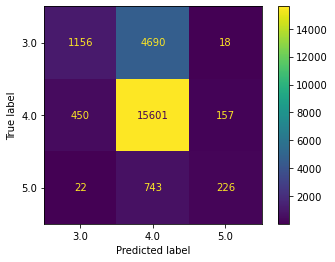

,mean,std
3.0_precision,0.710430,0.026576
3.0_recall,0.197132,0.013383
3.0_f1-score,0.308422,0.017443
4.0_precision,0.741709,0.001873
4.0_recall,0.962549,0.004197
4.0_f1-score,0.837815,0.001873
5.0_precision,0.566205,0.065555
5.0_recall,0.228091,0.038655
5.0_f1-score,0.323686,0.045055
accuracy,0.736374,0.003087


In [106]:
# wait
mnb = MultinomialNB(alpha = 2)
linearSVM = svm.LinearSVC(random_state=30027, C=5)
logr = LogisticRegression(solver='sag', max_iter=50, random_state = 30027)
knn = KNeighborsClassifier(n_neighbors=10)

sclf_dt = StackingCVClassifier(classifiers=[mnb, linearSVM, logr, knn], 
                            meta_classifier=CategoricalNB(),
                            cv = 2,
                            random_state=30027)
y_pred_dt, sclf_dt_report = cross_val_report(sclf_dt, X, y)
sclf_dt_report

## without mnb

In [111]:
param_grid = {'linearsvc__C': [1,5], 'logisticregression__max_iter': [50, 100, 150], 'kneighborsclassifier__n_neighbors': [5, 10],  'decisiontreeclassifier__max_depth': [200, 400]}
sclf_mnb = StackingCVClassifier(classifiers=[linearSVM, logr, knn, dt], 
                            meta_classifier=CategoricalNB(),
                            cv = 2,
                            random_state=30027)
grid_mnb = tune_hyperparameter(sclf_mnb, param_grid, X, y, cv=2)

Fitting 2 folds for each of 24 candidates, totalling 48 fits
[CV] END decisiontreeclassifier__max_depth=200, kneighborsclassifier__n_neighbors=5, linearsvc__C=1, logisticregression__max_iter=50; total time=  18.7s
[CV] END decisiontreeclassifier__max_depth=200, kneighborsclassifier__n_neighbors=5, linearsvc__C=1, logisticregression__max_iter=50; total time=  18.1s
[CV] END decisiontreeclassifier__max_depth=200, kneighborsclassifier__n_neighbors=5, linearsvc__C=1, logisticregression__max_iter=100; total time=  17.8s
[CV] END decisiontreeclassifier__max_depth=200, kneighborsclassifier__n_neighbors=5, linearsvc__C=1, logisticregression__max_iter=100; total time=  18.6s
[CV] END decisiontreeclassifier__max_depth=200, kneighborsclassifier__n_neighbors=5, linearsvc__C=1, logisticregression__max_iter=150; total time=  17.1s
[CV] END decisiontreeclassifier__max_depth=200, kneighborsclassifier__n_neighbors=5, linearsvc__C=1, logisticregression__max_iter=150; total time=  18.1s
[CV] END decision

In [112]:
print(max(grid_mnb['mean_test_accuracy']))
grid_mnb.loc[grid_mnb['mean_test_accuracy'] == max(grid_mnb['mean_test_accuracy'])]['params'].values

0.7318214810590811


array([{'decisiontreeclassifier__max_depth': 200, 'kneighborsclassifier__n_neighbors': 10, 'linearsvc__C': 5, 'logisticregression__max_iter': 50},
       {'decisiontreeclassifier__max_depth': 200, 'kneighborsclassifier__n_neighbors': 10, 'linearsvc__C': 5, 'logisticregression__max_iter': 100},
       {'decisiontreeclassifier__max_depth': 200, 'kneighborsclassifier__n_neighbors': 10, 'linearsvc__C': 5, 'logisticregression__max_iter': 150}],
      dtype=object)

StackingCVClassifier prediction took 252.79390597343445 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.707182    0.218058      0.333333       0.743639    0.955583   
1       0.708333    0.202726      0.315232       0.744864    0.961752   
2       0.682081    0.201365      0.310935       0.741536    0.959284   
3       0.680723    0.192833      0.300532       0.741182    0.959284   
4       0.754491    0.215017      0.334661       0.744175    0.965453   
5       0.662577    0.184300      0.288385       0.740229    0.958051   
6       0.724138    0.179181      0.287278       0.739972    0.967304   
7       0.713415    0.199659      0.312000       0.742073    0.967304   
8       0.707602    0.206133      0.319261       0.741289    0.958642   
9       0.707792    0.185690      0.294197       0.740000    0.959259   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.836393       0.465116    0.202020      0.281690  0.7

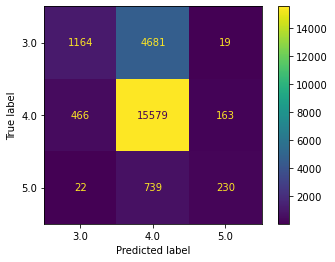

,mean,std
3.0_precision,0.704833,0.025454
3.0_recall,0.198496,0.012962
3.0_f1-score,0.309581,0.016970
4.0_precision,0.741896,0.001769
4.0_recall,0.961192,0.004110
4.0_f1-score,0.837421,0.001970
5.0_precision,0.559197,0.066043
5.0_recall,0.232131,0.043583
5.0_f1-score,0.326591,0.051240
accuracy,0.735941,0.003263


In [114]:
linearSVM = svm.LinearSVC(random_state=30027, C=5)
logr = LogisticRegression(solver='sag', max_iter=50, random_state = 30027)
knn = KNeighborsClassifier(n_neighbors=10)
dt = DecisionTreeClassifier(max_depth = 200)

sclf_dt = StackingCVClassifier(classifiers=[mnb, linearSVM, logr, knn], 
                            meta_classifier=CategoricalNB(),
                            cv = 2,
                            random_state=30027)
y_pred_dt, sclf_dt_report = cross_val_report(sclf_dt, X, y)
sclf_dt_report

## Feature Selection

In [6]:
x2 = SelectKBest(chi2, k='all')
x2.fit(X, y)
pvals = pd.DataFrame(x2.pvalues_, index=x2.feature_names_in_, columns=['p-value'])

x2_features = pvals[pvals['p-value'] < 0.01].index.tolist()
x2_features.remove('PublishDay')

StackingCVClassifier prediction took 121.89364004135132 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.689655    0.136286      0.227596       0.729254    0.970389   
1       0.672131    0.139693      0.231312       0.731594    0.968538   
2       0.660550    0.122867      0.207194       0.726141    0.971622   
3       0.603960    0.104096      0.177584       0.724344    0.971006   
4       0.724138    0.143345      0.239316       0.730431    0.972856   
5       0.663636    0.124573      0.209770       0.729466    0.969772   
6       0.760417    0.124573      0.214076       0.730363    0.980876   
7       0.721649    0.119454      0.204978       0.728985    0.979025   
8       0.691667    0.141397      0.234795       0.730734    0.971605   
9       0.692308    0.122658      0.208394       0.728538    0.969136   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.832716       0.558824    0.191919      0.285714  0.7

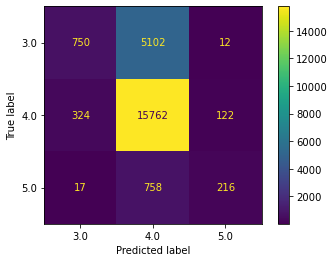

,mean,std
3.0_precision,0.688011,0.042660
3.0_recall,0.127894,0.012216
3.0_f1-score,0.215501,0.018374
4.0_precision,0.728985,0.002211
4.0_recall,0.972482,0.004158
4.0_f1-score,0.833306,0.002213
5.0_precision,0.619504,0.065686
5.0_recall,0.218010,0.035631
5.0_f1-score,0.321243,0.043576
accuracy,0.725318,0.004111


In [71]:
X_filtered = X[x2_features]
y_pred_filtered, sclf_filtered_report = cross_val_report(sclf3_cat, X_filtered, y)
sclf_filtered_report

StackingCVClassifier prediction took 188.4974489212036 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.722772    0.124361      0.212209       0.726606    0.977175   
1       0.700935    0.127768      0.216138       0.728236    0.975324   
2       0.673267    0.116041      0.197962       0.723239    0.975324   
3       0.662791    0.097270      0.169643       0.721893    0.978408   
4       0.732673    0.126280      0.215429       0.726109    0.979642   
5       0.696629    0.105802      0.183704       0.724532    0.978408   
6       0.814815    0.112628      0.197901       0.726860    0.988279   
7       0.730337    0.110922      0.192593       0.726734    0.982727   
8       0.722222    0.132879      0.224460       0.726731    0.978395   
9       0.726316    0.117547      0.202346       0.726939    0.977778   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.833465       0.538462    0.141414      0.224000  0.72

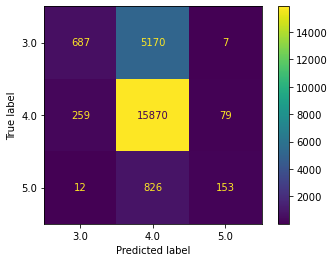

,mean,std
3.0_precision,0.718276,0.041695
3.0_recall,0.117150,0.010955
3.0_f1-score,0.201239,0.016622
4.0_precision,0.725788,0.001951
4.0_recall,0.979146,0.003846
4.0_f1-score,0.833639,0.002077
5.0_precision,0.641238,0.086965
5.0_recall,0.154444,0.036446
5.0_f1-score,0.247427,0.050837
accuracy,0.724537,0.003608


In [72]:
x2_features += ['PublishDay']
X_filtered = X[x2_features]
y_pred, sclf_report = cross_val_report(sclf, X_filtered, y)
sclf_report

## Test set prediction

In [8]:
X_features = list(X.columns)

In [9]:
X_features.remove('PublishDay')
X_features

['PublishYear',
 'PublishMonth',
 'pagesNumber',
 'gay_lesbian',
 'twentieth_century',
 'st_century',
 'united_state',
 'new_york',
 'th_century',
 'survival_guide',
 'around_world',
 'world_war',
 'war_ii',
 'civil_war',
 'essential_guide',
 'old_testament',
 'complete_guide',
 'field_guide',
 'african_american',
 'selected_poem',
 'fairy_tale',
 'de_la',
 'complete_idiot',
 'idiot_guide',
 'star_war',
 'science_fiction',
 'berenstain_bear',
 'american_history',
 'practical_guide',
 'study_guide',
 'true_story',
 'short_story',
 'cultural_history',
 'rough_guide',
 'need_know',
 'step_step',
 'theory_practice',
 'cambridge_companion',
 'cam_jansen',
 'new_world',
 'everyday_life',
 'choose_adventure',
 'nineteenth_century',
 'cold_war',
 'life_time',
 'middle_age',
 'holy_bible',
 'little_book',
 'life_death',
 'american_culture',
 'lonely_planet',
 'ultimate_guide',
 'new_testament',
 'br br',
 'br book',
 'life br',
 'new york',
 'york city',
 'year old',
 'year ago',
 'short story'

In [10]:
X_test = pd.read_csv("./Final/Datasets/test_df_ohe.csv", keep_default_na=False)[X_features]

In [11]:
def get_pred_df(y_pred):
    """
    Converts the list of predictions to a DataFrame with 2 columns (id, rating_label).
    Returns the resultant DataFrame.
    """
    
    pred_df = pd.DataFrame(y_pred).reset_index().set_axis(['id', 'rating_label'], axis=1)
    pred_df['id'] = pred_df['id']+1  # id starts from 1
    return pred_df

### 3 base classifiers & meta = CategoricalNB

In [96]:
# selected feature set
mnb = MultinomialNB(alpha = 1)
linearSVM = svm.LinearSVC(random_state=30027, C=1)
logr = LogisticRegression(solver='sag', max_iter=150, random_state = 30027)

sclf3_cat = StackingCVClassifier(classifiers=[mnb, linearSVM, logr], 
                            meta_classifier=CategoricalNB(),
                            cv = 2,
                            random_state=30027)

if 'PublishDay' in x2_features: 
    x2_features.remove('PublishDay')
X_filtered = X[x2_features]

sclf3_cat.fit(X_filtered, y)
X_test_filtered = X_test[x2_features]
get_pred_df(sclf3_cat.predict(X_test_filtered)).to_csv("filtered_sclf3_cat_pred.csv", index=False)

In [97]:
# full feature set
sclf3_cat.fit(X[X_features], y)
get_pred_df(sclf3_cat.predict(X_test)).to_csv("full_sclf3_cat_pred.csv", index=False)

### 4 base classifiers & meta = CategoricalNB

In [12]:
# selected feature set
mnb = MultinomialNB(alpha = 1)
linearSVM = svm.LinearSVC(random_state=30027, C=1)
logr = LogisticRegression(solver='sag', max_iter=150, random_state = 30027)
dt = DecisionTreeClassifier(max_depth = 200, random_state = 30027)

sclf_knn = StackingCVClassifier(classifiers=[mnb, linearSVM, logr, dt], 
                            meta_classifier=CategoricalNB(),
                            cv = 2,
                            random_state=30027)

if 'PublishDay' in x2_features: 
    x2_features.remove('PublishDay')
X_filtered = X[x2_features]

sclf_knn.fit(X_filtered, y)
X_test_filtered = X_test[x2_features]
get_pred_df(sclf_knn.predict(X_test_filtered)).to_csv("filtered_sclf_knn_pred.csv", index=False)

In [13]:
# full feature set
sclf_knn.fit(X[X_features], y)
get_pred_df(sclf_knn.predict(X_test)).to_csv("full_sclf_knn_pred.csv", index=False)

## Error analysis